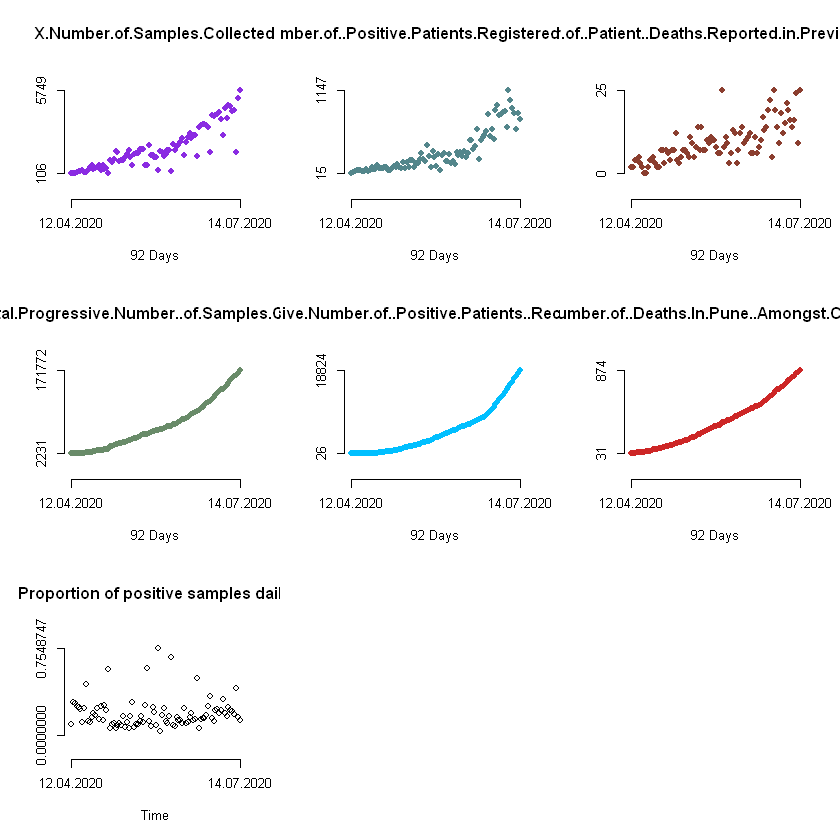

In [7]:
library('xlsx')
#Function Definition of average of running_means
average_of_running_means_till<-function(data,row,col)
{
#data should be a data.frame
	if(row!=1&&row>0&&row%%1==0 ){
	running_mean<-vector(length=row)
	for(k in 1:row){
		running_mean[k] <- mean(as.numeric(data[[col]][1:row]),na.rm=TRUE)
			}

return(mean(running_mean))


}
if(row==1){
return(as.numeric(0))}

}


PMC_raw_data<-read.xlsx('Data.xlsx',sheetName =  'Data from daily press release',startRow = 1,endRow = 93,stringsAsFactors=FALSE) 

#Idea 1: Plot each column as a timeseries
par(mfrow=c(3,3))

for( i in 2:ncol(PMC_raw_data)){

#number of rows = nrow(PMC_raw_data) so the dates correspond to 1:nrow(PMC_raw_data) respectively
if((any(is.na(PMC_raw_data[[i]])) == FALSE)&all(is.numeric(PMC_raw_data[[i]]))==TRUE){

plot.new()

plot.window(xlim = c(0,nrow(PMC_raw_data)-1),ylim = c( min( PMC_raw_data[[i]]),max( PMC_raw_data[[i]])),asp = log((nrow(PMC_raw_data)-1))/(max( PMC_raw_data[[i]]) - min( PMC_raw_data[[i]])) * 10)
title(main = paste0(colnames(PMC_raw_data)[i]),xlab = paste(nrow(PMC_raw_data),"Days"))
#did some trial and error and this gives a good representation of the data

axis(1,c(0,nrow(PMC_raw_data)-1),labels=c(PMC_raw_data[[1]][1],PMC_raw_data[[1]][length(PMC_raw_data[[1]])]))

axis(2,c( min( PMC_raw_data[[i]]),max( PMC_raw_data[[i]])))

for (j in 1:nrow(PMC_raw_data))
{
points(j-1,PMC_raw_data[[j,i]],pch = 19,col = colors()[1+15*i])
}
}
#Ahead of here is to do with dataformatting of the columns that do not have numeric arguments The average of the running mean seems to be a decent estimate for that value.First for "-"

#for(j in c(which(PMC_raw_data[[i]]=="_"),which(PMC_raw_data[[i]]=="-"))){#The na condition , which(is.na(PMC_raw_data[[i]])==T) has been removed due the fact that the #nas are in the columns which have no meaning for average values
#	PMC_raw_data[[j,i]] <- average_of_running_means_till(PMC_raw_data,j,i)


#}


}

#,main=print(paste0(colnames(PMC_raw_data)[i]))






#Assuming that only 20% of the patients are serious need ICU care + vents so 20% of the recovered patients can be assumed to be the ones that were in critical care

#number of critical patients on date is sum of critical patients on days till date - 20% of recovred number till date

#number of deaths till date is sum of deaths on days till date

#The ratio of deaths till date / critcal patients on date gives a measure of how the medical infrastructure is dealing with critical cases
#
plot.new()
plot.window(xlim = c(0,nrow(PMC_raw_data)-1),ylim = c( 0,max( PMC_raw_data[[3]]/PMC_raw_data[[2]])),asp = log((nrow(PMC_raw_data)-1))/(max( PMC_raw_data[[3]]/PMC_raw_data[[2]]) - min( PMC_raw_data[[3]]/PMC_raw_data[[2]])) * 10)
axis(1,c(0,nrow(PMC_raw_data)-1),labels=c(PMC_raw_data[[1]][1],PMC_raw_data[[1]][length(PMC_raw_data[[1]])]))
axis(2,c( 0,max( PMC_raw_data[[3]]/PMC_raw_data[[2]])))
 for (j in 1:nrow(PMC_raw_data))
 {
 points(j-1,PMC_raw_data[[j,3]]/PMC_raw_data[[j,2]])}
title(main = paste0("Proportion of positive samples daily"),xlab = paste("Time"))
